In [1]:
#Import python modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from fastai.tabular.all import df_shrink
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

np.random.seed(0)
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Loading The Dataset

dfps = ['CIDDS-002-week1.csv', 'CIDDS-002-week2.csv']

In [3]:
df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in dfps], ignore_index=True, copy=False)

C:\Users\ankit\AppData\Local\Temp\ipykernel_21076\1546817612.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in dfps], ignore_index=True, copy=False)
C:\Users\ankit\AppData\Local\Temp\ipykernel_21076\1546817612.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in dfps], ignore_index=True, copy=False)


In [4]:
#df = pd.read_csv('CIDDS-002-week1.csv')

In [5]:
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,label,attackType,attackID,attackDescription
0,2017-08-02 00:00:00.419,0.003,TCP,192.168.210.55,44870,192.168.100.11,445.0,2,174,1,.AP...,0,normal,---,---,---
1,2017-08-02 00:00:00.421,0.000,TCP,192.168.100.11,445,192.168.210.55,44870.0,1,108,1,.AP...,0,normal,---,---,---
2,2017-08-02 00:00:02.593,0.004,TCP,192.168.220.47,55101,192.168.100.11,445.0,2,174,1,.AP...,0,normal,---,---,---
3,2017-08-02 00:00:02.859,0.000,TCP,10000_34,443,192.168.210.54,59628.0,1,100,1,.AP...,0,normal,---,---,---
4,2017-08-02 00:00:02.594,0.000,TCP,192.168.100.11,445,192.168.220.47,55101.0,1,108,1,.AP...,0,normal,---,---,---


In [6]:
df.isnull().sum()

Date first seen      0
Duration             0
Proto                0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
label                0
attackType           0
attackID             0
attackDescription    0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

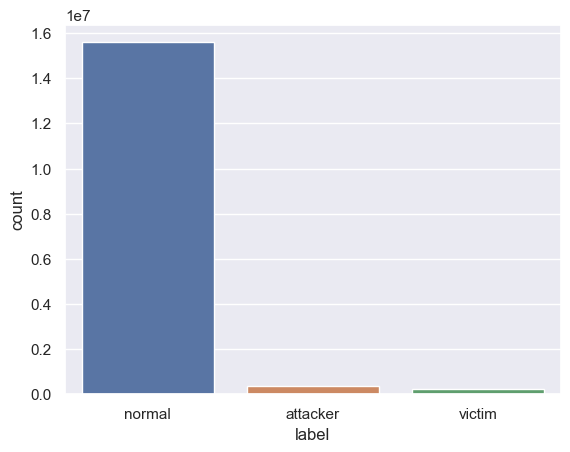

In [7]:
sns.set(style = "darkgrid")
sns.countplot(x = "label",data=df)

In [8]:
df["Flags"].unique()

array(['.AP...', '.A....', '......', '.AP.S.', '.A...F', '.AP..F',
       '.AP.SF', '.A.R..', '.APR.F', '.APRS.', '.APR..', '....S.',
       '.A.R.F', '.A..S.', '...R..', '.A..SF', '.APRSF', '...RS.',
       '.A.RSF', '.A.RS.', '.....F'], dtype=object)

In [9]:
df["A"]=0
df["P"]=0
df["S"]=0
df["R"]=0
df["F"]=0

In [10]:
def set_flag(df,check):
    val=0;
    if(check in list(df["Flags"])):
        val = 1 ;
    return val;

In [11]:
df["A"] = df.apply(set_flag,check ="A", axis = 1)
df["P"] = df.apply(set_flag,check = "P" ,axis = 1)
df["S"] = df.apply(set_flag,check ="S",axis = 1)
df["R"] = df.apply(set_flag,check="R" ,axis = 1)
df["F"] = df.apply(set_flag,check ="F" ,axis = 1)

In [12]:
print(df.shape)
print(df.columns)
df.head()

(16161183, 21)
Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'label', 'attackType', 'attackID', 'attackDescription', 'A', 'P', 'S',
       'R', 'F'],
      dtype='object')


,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,label,attackType,attackID,attackDescription,A,P,S,R,F
0,2017-08-02 00:00:00.419,0.003,TCP,192.168.210.55,44870,192.168.100.11,445.0,2,174,1,.AP...,0,normal,---,---,---,1,1,0,0,0
1,2017-08-02 00:00:00.421,0.000,TCP,192.168.100.11,445,192.168.210.55,44870.0,1,108,1,.AP...,0,normal,---,---,---,1,1,0,0,0
2,2017-08-02 00:00:02.593,0.004,TCP,192.168.220.47,55101,192.168.100.11,445.0,2,174,1,.AP...,0,normal,---,---,---,1,1,0,0,0
3,2017-08-02 00:00:02.859,0.000,TCP,10000_34,443,192.168.210.54,59628.0,1,100,1,.AP...,0,normal,---,---,---,1,1,0,0,0
4,2017-08-02 00:00:02.594,0.000,TCP,192.168.100.11,445,192.168.220.47,55101.0,1,108,1,.AP...,0,normal,---,---,---,1,1,0,0,0


In [13]:
# Removing the unwanted columns

df=df.drop(columns = ["Date first seen","attackID","Flows","Tos","Flags","attackType"])

In [14]:
# Renaming the column name and convert into lower case

df = df.rename(str.lower, axis='columns')
df = df.rename(str.strip, axis='columns')
df.rename(columns={
            'src ip addr': 'src_ip_addr',
            'src pt': 'src_pt',
            'dst ip addr': 'dst_ip_addr',
            'dst pt': 'dst_pt',
            'attackdescription': 'attack_description'
        }, inplace=True)

In [15]:
# Filling the vacant places with 0 in the bytes 

df['bytes'] = df['bytes'].replace(['---'],'0')
df['bytes'] = df['bytes'].astype('str')

In [16]:
df['dst_pt'] = df['dst_pt'].astype(int)

In [17]:
print(df.shape)
print(df.columns)
df.head()

(16161183, 15)
Index(['duration', 'proto', 'src_ip_addr', 'src_pt', 'dst_ip_addr', 'dst_pt',
       'packets', 'bytes', 'label', 'attack_description', 'a', 'p', 's', 'r',
       'f'],
      dtype='object')


,duration,proto,src_ip_addr,src_pt,dst_ip_addr,dst_pt,packets,bytes,label,attack_description,a,p,s,r,f
0,0.003,TCP,192.168.210.55,44870,192.168.100.11,445,2,174,normal,---,1,1,0,0,0
1,0.000,TCP,192.168.100.11,445,192.168.210.55,44870,1,108,normal,---,1,1,0,0,0
2,0.004,TCP,192.168.220.47,55101,192.168.100.11,445,2,174,normal,---,1,1,0,0,0
3,0.000,TCP,10000_34,443,192.168.210.54,59628,1,100,normal,---,1,1,0,0,0
4,0.000,TCP,192.168.100.11,445,192.168.220.47,55101,1,108,normal,---,1,1,0,0,0


In [18]:
df = df_shrink(df)

In [19]:
df.dtypes

duration               float32
proto                 category
src_ip_addr           category
src_pt                   int32
dst_ip_addr           category
dst_pt                   int32
packets                  int32
bytes                 category
label                 category
attack_description    category
a                         int8
p                         int8
s                         int8
r                         int8
f                         int8
dtype: object

In [20]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [21]:
# removing the duplicate values in the rows

duplicate = df.duplicated().sum()
if duplicate > 0:
    print(duplicate, "fully duplicate rows")
    df.drop_duplicates(inplace=True)
df.shape

5574170 fully duplicate rows


(10587013, 15)

In [22]:
df.reset_index(inplace=True, drop=True)

In [23]:
print(df['label'].unique())

['normal', 'attacker', 'victim']
Categories (3, object): ['attacker', 'normal', 'victim']


In [24]:
import re
def func(data):
    num1=data["bytes"]
    if "M" in data["bytes"]:
        num=re.findall("[0-9.0-9]",data["bytes"])
        num1 = float("".join(num))*100000
    num1 = float(num1)
    return num1

In [25]:
df["bytes"] = df.apply(func,axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587013 entries, 0 to 10587012
Data columns (total 15 columns):
 #   Column              Dtype   
---  ------              -----   
 0   duration            float32 
 1   proto               category
 2   src_ip_addr         category
 3   src_pt              int32   
 4   dst_ip_addr         category
 5   dst_pt              int32   
 6   packets             int32   
 7   bytes               float64 
 8   label               category
 9   attack_description  category
 10  a                   int8    
 11  p                   int8    
 12  s                   int8    
 13  r                   int8    
 14  f                   int8    
dtypes: category(5), float32(1), float64(1), int32(3), int8(5)
memory usage: 364.2 MB


Absolute Frequencies:
label
normal      10112095
attacker      314293
victim        160625
Name: count, dtype: int64

Percentages:
label
normal      0.955141
attacker    0.029687
victim      0.015172
Name: proportion, dtype: float64


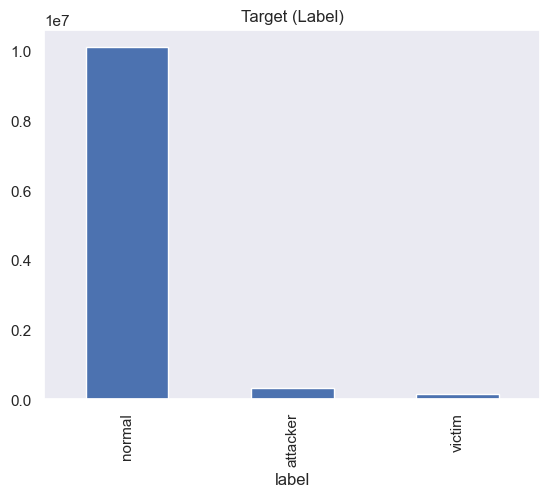

In [27]:
# target distribution
print('Absolute Frequencies:')
print(df.label.value_counts())
print()


print('Percentages:')
print(df.label.value_counts(normalize=True))

df.label.value_counts().plot(kind='bar')
plt.title('Target (Label)')
plt.grid()
plt.show()

In [28]:
df['proto'].value_counts()

proto
TCP      8525750
UDP      2049827
ICMP       10832
IGMP         604
Name: count, dtype: int64

In [29]:
df['attack_description'].value_counts()

attack_description
---                           10112095
nmap args: -sF -T 3              97068
nmap args: -sS -T 2              70287
nmap args: -sF -T 2              62403
nmap args: -sU -T 2              60941
nmap args: -sA -T 3              45583
nmap args: -sS -T 1              38731
nmap args: -sF -T 1              33307
nmap args: -sU -T 3              25550
nmap args: -sA -T 1              15919
nmap args: -sU -T 1              12554
nmap args: -sS -T 3               5114
nmap args: -sA -T 2               4410
nmap args: -sU -T 0               2163
nmap args: -n -sP -PE -T 2         555
nmap args: -n -sP -PE -T 1         333
Name: count, dtype: int64

In [30]:
df['proto'].value_counts()

proto
TCP      8525750
UDP      2049827
ICMP       10832
IGMP         604
Name: count, dtype: int64

In [31]:
df['attack_description'] = df['attack_description'].replace(['---'], 'normal')
df['attack_description'] = df['attack_description'].replace(['nmap args: -sS -T 1', 'nmap args: -sS -T 2', 'nmap args: -sS -T 3'], 'SYN Scan')
df['attack_description'] = df['attack_description'].replace(['nmap args: -sF -T 1', 'nmap args: -sF -T 2', 'nmap args: -sF -T 3'], 'FIN Scan')
df['attack_description'] = df['attack_description'].replace(['nmap args: -sU -T 0 ', 'nmap args: -sU -T 1', 'nmap args: -sU -T 2', 'nmap args: -sU -T 3' ], 'UDP Scan')
df['attack_description'] = df['attack_description'].replace(['nmap args: -sA -T 1', 'nmap args: -sA -T 2', 'nmap args: -sA -T 3'], 'ACK Scan')
df['attack_description'] = df['attack_description'].replace(['nmap args: -n -sP -PE -T 1', 'nmap args: -n -sP -PE -T 2', 'nmap args: -n -sP -PE -T 3'], 'Ping Scan')
df['attack_description'].value_counts()

attack_description
normal       10112095
FIN Scan       192778
SYN Scan       114132
UDP Scan       101208
ACK Scan        65912
Ping Scan         888
Name: count, dtype: int64

In [32]:
df['attack_description'] = df['attack_description'].replace(['SYN Scan', 'FIN Scan', 'ACK Scan'], 'TCP')
df['attack_description'] = df['attack_description'].replace(['UDP Scan'], 'UDP')
df['attack_description'] = df['attack_description'].replace(['Ping Scan'], 'ICMP')
df['attack_description'].value_counts()

attack_description
normal    10112095
TCP         372822
UDP         101208
ICMP           888
Name: count, dtype: int64

In [33]:
df.head(15)

,duration,proto,src_ip_addr,src_pt,dst_ip_addr,dst_pt,packets,bytes,label,attack_description,a,p,s,r,f
0,0.003,TCP,192.168.210.55,44870,192.168.100.11,445,2,174.0,normal,normal,1,1,0,0,0
1,0.000,TCP,192.168.100.11,445,192.168.210.55,44870,1,108.0,normal,normal,1,1,0,0,0
2,0.004,TCP,192.168.220.47,55101,192.168.100.11,445,2,174.0,normal,normal,1,1,0,0,0
3,0.000,TCP,10000_34,443,192.168.210.54,59628,1,100.0,normal,normal,1,1,0,0,0
4,0.000,TCP,192.168.100.11,445,192.168.220.47,55101,1,108.0,normal,normal,1,1,0,0,0
5,0.210,TCP,192.168.210.54,59628,10000_34,443,2,154.0,normal,normal,1,1,0,0,0
6,0.000,TCP,192.168.100.11,445,192.168.220.42,58001,1,108.0,normal,normal,1,1,0,0,0
7,0.002,TCP,192.168.220.42,58001,192.168.100.11,445,2,174.0,normal,normal,1,1,0,0,0
8,0.000,TCP,192.168.100.11,445,192.168.220.46,49770,1,108.0,normal,normal,1,1,0,0,0
9,0.001,TCP,192.168.220.46,49770,192.168.100.11,445,2,174.0,normal,normal,1,1,0,0,0


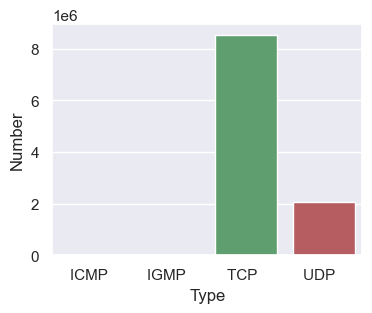

In [34]:
#Plot the protocol categories.

sns.set(rc = {'figure.figsize' : (4, 3)})
ax = sns.countplot(x = 'proto', data = df)
ax.set(xlabel = 'Type', ylabel = 'Number')
plt.show() 

In [35]:
col = ["proto","label","src_ip_addr","dst_ip_addr","attack_description"]
enc = LabelEncoder()
for col_name in col:
    df[col_name]=enc.fit_transform(df[col_name])

In [36]:
data = df.copy()
data=data.drop(columns = ["attack_description"])

<Axes: >

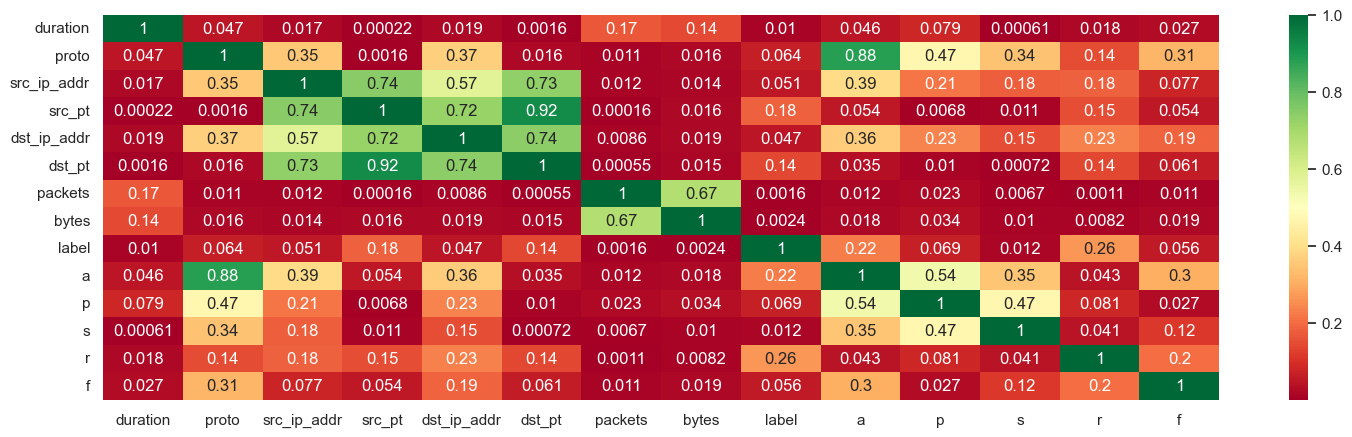

In [37]:
fig, ax = plt.subplots(figsize=(18,5)) 
sns.heatmap(abs(data.corr()), annot=True,cmap = "RdYlGn")

In [38]:
features_cat = ['src_pt','dst_pt']

Feature:  src_pt
src_pt
443      2170306
80       1775407
53        983890
52125      15212
58911      15187
34959      15174
43202      15161
47529      15154
42008      15154
38082      15131
Name: count, dtype: int64



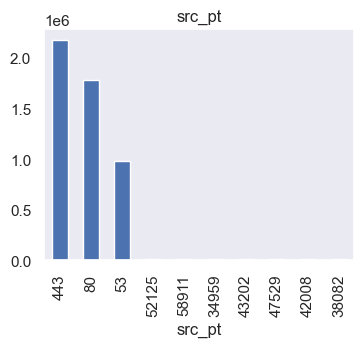

Feature:  dst_pt
dst_pt
443      2359050
80       1813219
53        967199
445        19282
47529      11192
52125      11177
43202      11152
42008      11118
57047      11033
62653      10995
Name: count, dtype: int64



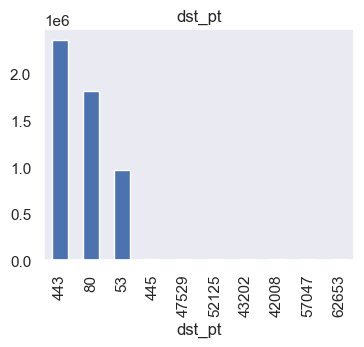

In [39]:
for f in features_cat:
    print('Feature: ',f)
    print(df[f].value_counts()[0:10])
    print()
    df[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

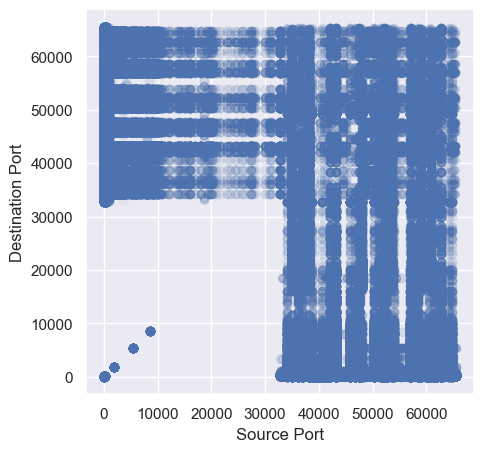

In [40]:
# Source/Destination
plt.figure(figsize=(5,5))
plt.scatter(df['src_pt'], df['dst_pt'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination Port')
plt.show()

In [41]:
df = df.drop(df.loc[df['attack_description'] == 'normal'].sample(frac = 0.8).index)

In [42]:
data_y = df["label"]
data_x = df.drop(columns = ["label"])

In [43]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587013 entries, 0 to 10587012
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float32
 1   proto               int32  
 2   src_ip_addr         int32  
 3   src_pt              int32  
 4   dst_ip_addr         int32  
 5   dst_pt              int32  
 6   packets             int32  
 7   bytes               float64
 8   attack_description  int32  
 9   a                   int8   
 10  p                   int8   
 11  s                   int8   
 12  r                   int8   
 13  f                   int8   
dtypes: float32(1), float64(1), int32(7), int8(5)
memory usage: 454.3 MB


In [44]:
data_y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10587013 entries, 0 to 10587012
Series name: label
Non-Null Count     Dtype
--------------     -----
10587013 non-null  int32
dtypes: int32(1)
memory usage: 40.4 MB


In [45]:
#Splitting the data training and testing.
#For Training the model ue 70% of the data int the dataset
#For Testing the model ue 30% of the data int the dataset

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=1)

In [46]:
# Importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [47]:
#initialize the RNN
regressor  = Sequential()

In [48]:
# Adding the first LSTM Layer and some Dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))

In [49]:
#Adding a second LSTM Layer and some Dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2) )

In [50]:
# Adding a third LSTM Layer and some Dropout regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [51]:
#Adding a fourth LSTM Layer and some Dropout regularization

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [52]:
regressor.add(Dense(units = 1))

In [53]:
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [54]:
#Layers of the Model

regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [55]:
#fitting the model

history = regressor.fit(X_train,y_train,epochs=7,batch_size=50,verbose=1,validation_split=0.2) 

Epoch 1/7
118575/118575 [==============================] - 4719s 40ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 9.0776e-05 - val_mean_squared_error: 9.0776e-05
Epoch 2/7
118575/118575 [==============================] - 4802s 40ms/step - loss: 6.5199e-04 - mean_squared_error: 6.5199e-04 - val_loss: 8.2276e-05 - val_mean_squared_error: 8.2276e-05
Epoch 3/7
118575/118575 [==============================] - 4659s 39ms/step - loss: 4.0047e-04 - mean_squared_error: 4.0047e-04 - val_loss: 1.1700e-04 - val_mean_squared_error: 1.1700e-04
Epoch 4/7
118575/118575 [==============================] - 3857s 33ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 7.4757e-05 - val_mean_squared_error: 7.4757e-05
Epoch 5/7
118575/118575 [==============================] - 3863s 33ms/step - loss: 3.5315e-04 - mean_squared_error: 3.5315e-04 - val_loss: 5.5084e-05 - val_mean_squared_error: 5.5084e-05
Epoch 6/7
118575/118575 [==============================] - 3867s 33ms/step - loss

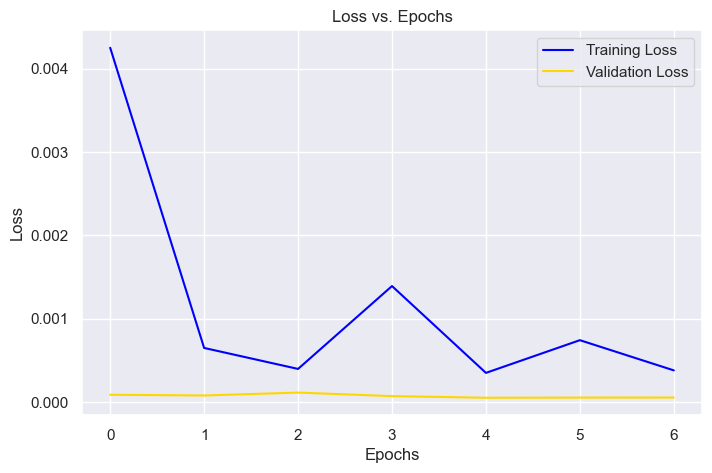

In [59]:
#Plot Training Loss vs Validation Loss

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss' , color='blue') 
plt.plot(history.history['val_loss'], label='Validation Loss' , color='gold')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

In [60]:
y_predict = regressor.predict(X_test)

99254/99254 [==============================] - 887s 9ms/step


In [61]:
#Accuracy Score for the Model

from sklearn.metrics import r2_score
print(f''' The train accuracy : {r2_score(y_train,regressor.predict(X_train))}
The test accuracy : {r2_score(y_test , y_predict)}''')

231591/231591 [==============================] - 2215s 10ms/step
 The train accuracy : 0.998525996377196
The test accuracy : 0.9990664649580545


In [ ]:
# lstm
# auto encoder
# rnn


In [ ]:
#Abstract -250 words
#Keywords -5 to 6 keywords
#Introduction -1 page
#Literature Review -12 to 15 paper reviews
    #eg: Jhone, Jhonon
    #jone et al(2018)
    #discussed -----------
    
#
#Reults - Graph
          #accuracy
          #efficiency
          #throughput line
          #cost utilization
